# 薪资变成最小值，平均值，最大值

In [1]:
def get_salary(salary):
    salary = salary.lower().replace('k', '').replace('以上', '')
    salary_range = salary.split('-')   

    if len(salary_range) == 1:
        return int(salary_range[0]), int(salary_range[0]), int(salary_range[0])
    
    avg_salary = (int(salary_range[0]) + int(salary_range[1])) / 2.0    
    return int(salary_range[0]), avg_salary, int(salary_range[1])


In [2]:
# example
import pandas as pd
import re

#file_name = 'lagou_copy.xls'
#jobs_data = pd.read_excel(file_name)

file_name = 'lagou_copy.csv'
jobs_data = pd.read_csv(file_name)

jobs_data[['lower_salary', 'avg_salary', 'upper_salary']] = jobs_data.apply(lambda x: get_salary(x['salary']),
                                                                            axis=1,
                                                                            result_type="expand")

jobs_data.head(10)

/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,positionName,district,stationname,jobNature,companyLabelList,industryField,salary,companySize,skillLables,...,city,keyword,firstType,secondType,thirdType,latitude,longitude,lower_salary,avg_salary,upper_salary
0,48028,游戏场景/原画设计师,朝阳区,东湖渠,全职,"['技能培训', '节日礼物', '专项奖金', '带薪年假']","移动互联网,游戏",10k-15k,150-500人,"['原画', '场景']",...,北京,原画师,设计类,原画|美术|特效,游戏场景,40.011925,116.471587,10.0,12.5,15.0
1,48029,python工程师,大兴区,荣昌东街,全职,"['绩效奖金', '专项奖金', '午餐补助', '定期体检']",移动互联网,14k-28k,15-50人,"['后端', 'docker', '服务器端']",...,北京,python,开发|测试|运维类,后端开发,Python,39.791831,116.512863,14.0,21.0,28.0
2,48030,测试工程师,西城区,北海北,全职,"['移动医疗', '职位晋升', '管理规范', '福利全面']","医疗丨健康,移动互联网",8k-15k,50-150人,['测试'],...,北京,测试,开发|测试|运维类,测试,测试工程师,39.941432,116.392581,8.0,11.5,15.0
3,48031,web前端开发工程师(仅限应届生),海淀区,军事博物馆,全职,"['带薪年假', '团队nice', '扁平管理', '通讯津贴']","移动互联网,金融",8k-12k,15-50人,['前端开发'],...,北京,前端开发,开发|测试|运维类,前端开发,WEB前端,39.909371,116.311868,8.0,10.0,12.0
4,48032,高级Java后端开发工程师,海淀区,中关村,全职,[],"医疗丨健康,数据服务",15k-20k,150-500人,[],...,北京,后端开发,开发|测试|运维类,后端开发,Java,39.979487,116.306446,15.0,17.5,20.0
5,48033,UI设计师(JC2J1),朝阳区,国贸,全职,"['股票期权', '五险一金', '带薪年假', '节日礼物']","移动互联网,社交",12k-18k,150-500人,['UI'],...,北京,UI设计,设计类,视觉,UI,39.9,116.4724,12.0,15.0,18.0
6,48034,金蝶EAS系统运维工程师,海淀区,知春路,全职,"['带薪年假', '专项奖金', '六险一金', '餐饮补贴']","教育,移动互联网",12k-15k,2000人以上,[],...,北京,运维,开发|测试|运维类,运维,运维开发工程师,39.987066,116.34122,12.0,13.5,15.0
7,48035,高级Java开发工程师,朝阳区,望京东,全职,"['技能培训', '绩效奖金', '岗位晋升', '领导好']",消费生活,30k-60k,2000人以上,[],...,北京,Java,开发|测试|运维类,后端开发,Java,40.008142,116.486622,30.0,45.0,60.0
8,48036,php,朝阳区,东风北桥,全职,"['绩效奖金', '五险一金', '带薪年假', '免费班车']",房产家居,10k-20k,2000人以上,"['后端', 'MySQL']",...,北京,php,开发|测试|运维类,后端开发,PHP,39.953904,116.499553,10.0,15.0,20.0
9,48037,搜狗输入法-交互设计专家,海淀区,北京大学东门,全职,"['岗位晋升', '扁平管理', '管理规范', '精英团队']",工具,25k-45k,2000人以上,"['交互', '设计']",...,北京,交互设计,设计类,交互,交互设计师,39.993798,116.332289,25.0,35.0,45.0


# 大类岗位分出 小类岗位(不参考)

In [89]:
#pType = ['产品线', '技术线', '设计线', '运营线']

product = ['产品经理', '数据产品经理']
technology = ['后端', '前端', '测试', '运维']
designer = ['交互设计', 'UI设计', '原画师', '动画师']
operations = ['内容运营', '电商运营', '用户运营', '数据运营']
AI = ['自然语言', '计算机视觉']

position = product + technology + designer + operations

def position_type(pName):
    for i in position:
        if re.search(i, pName):
            return i

In [90]:
# example
jobs_data['positiontype'] = jobs_data.apply(lambda x:
                                            position_type(x['positionName']),
                                            axis=1)


In [ ]:
jobs_data[jobs_data['positiontype'].isnull()]

# 岗位级别

In [85]:

def set_joblevel(Pname):
    job_level = ['中级', '主管', '高级', '资深', '总监', '专家', '副总', '初级']
    for level in job_level:
        if re.search(level, Pname):
            return level 
 #   return '初级'

In [161]:
jobs_data = jobs_data.drop(labels='jobLevel',axis=1)

In [86]:
jobs_data['jobLevel'] = jobs_data.apply(lambda x:  set_joblevel(x['positionName']),axis=1)

In [87]:
# secondType
jobs_data[jobs_data['jobLevel'].isnull()]

,id,positionName,district,stationname,jobNature,companyLabelList,industryField,salary,companySize,skillLables,...,keyword,firstType,secondType,thirdType,latitude,longitude,lower_salary,avg_salary,upper_salary,jobLevel
0,48028,游戏场景/原画设计师,朝阳区,东湖渠,全职,"['技能培训', '节日礼物', '专项奖金', '带薪年假']","移动互联网,游戏",10k-15k,150-500人,"['原画', '场景']",...,原画师,设计类,原画|美术|特效,游戏场景,40.011925,116.471587,10.0,12.5,15.0,None
1,48029,python工程师,大兴区,荣昌东街,全职,"['绩效奖金', '专项奖金', '午餐补助', '定期体检']",移动互联网,14k-28k,15-50人,"['后端', 'docker', '服务器端']",...,python,开发|测试|运维类,后端开发,Python,39.791831,116.512863,14.0,21.0,28.0,None
2,48030,测试工程师,西城区,北海北,全职,"['移动医疗', '职位晋升', '管理规范', '福利全面']","医疗丨健康,移动互联网",8k-15k,50-150人,['测试'],...,测试,开发|测试|运维类,测试,测试工程师,39.941432,116.392581,8.0,11.5,15.0,None
3,48031,web前端开发工程师(仅限应届生),海淀区,军事博物馆,全职,"['带薪年假', '团队nice', '扁平管理', '通讯津贴']","移动互联网,金融",8k-12k,15-50人,['前端开发'],...,前端开发,开发|测试|运维类,前端开发,WEB前端,39.909371,116.311868,8.0,10.0,12.0,None
5,48033,UI设计师(JC2J1),朝阳区,国贸,全职,"['股票期权', '五险一金', '带薪年假', '节日礼物']","移动互联网,社交",12k-18k,150-500人,['UI'],...,UI设计,设计类,视觉,UI,39.9,116.4724,12.0,15.0,18.0,None
6,48034,金蝶EAS系统运维工程师,海淀区,知春路,全职,"['带薪年假', '专项奖金', '六险一金', '餐饮补贴']","教育,移动互联网",12k-15k,2000人以上,[],...,运维,开发|测试|运维类,运维,运维开发工程师,39.987066,116.34122,12.0,13.5,15.0,None
8,48036,php,朝阳区,东风北桥,全职,"['绩效奖金', '五险一金', '带薪年假', '免费班车']",房产家居,10k-20k,2000人以上,"['后端', 'MySQL']",...,php,开发|测试|运维类,后端开发,PHP,39.953904,116.499553,10.0,15.0,20.0,None
10,48038,产品经理,海淀区,西二旗,全职,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",文娱丨内容,25k-50k,2000人以上,[],...,产品经理,产品|需求|项目类,产品经理,产品经理,40.053902,116.313599,25.0,37.5,50.0,None
11,48039,数据产品经理,朝阳区,三元桥,全职,"['专项奖金', '股票期权', '绩效奖金', '年终分红']","移动互联网,电商",35k-55k,2000人以上,"['商业产品', '数据']",...,数据产品经理,产品|需求|项目类,产品经理,数据产品经理,39.949277,116.460558,35.0,45.0,55.0,None
12,48040,测试工程师,朝阳区,大望路,全职,[],"金融,企业服务",12k-18k,少于15人,"['测试', '功能测试', '性能测试', '自动化']",...,测试,开发|测试|运维类,测试,测试工程师,39.912144,116.482183,12.0,15.0,18.0,None


# 为None随机添加岗位（不推荐）

In [ ]:
def add_positiontype(type):
    positiontype = dict(产品线 = ['产品经理', '数据产品经理'],
                        技术线 = ['后端', '前端', '测试', '运维'],
                        设计线 = ['交互设计', 'UI设计', '原画师', '动画师'],
                        运营线 = ['内容运营', '电商运营', '用户运营', '数据运营'])
    return positiontype[type][np.random.randint(len(type))]

# 可视化

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#from pylab import mpl

plt.style.use('ggplot')
#mpl.rcParams['font.sans-serif'] = ['SimHei']  
figsize = (10, 10)
plt.rc('figure', figsize=figsize)  
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False 

%matplotlib inline

# 学历与工资的可视化
fig = plt.figure(dpi=150)
jobs_data.groupby(['education']).mean()['avg_salary'].sort_values(ascending=True).plot.barh()

# 工作年限与工资的可视化
fig = plt.figure(dpi=150)
jobs_data.groupby(['workYear']).mean()['avg_salary'].sort_values(ascending=True).plot.barh()

# 公司规模与工资
fig = plt.figure(dpi=150)
jobs_data.groupby(['companySize']).mean()['avg_salary'].sort_values(ascending=True).plot.barh()

# 岗位大类与工资
fig = plt.figure(dpi=150)
jobs_data.groupby(['type']).mean()['avg_salary'].sort_values(ascending=True).plot.barh()

# 数据清洗

In [ ]:
# 取出重复值
jobs_data= jobs_data.drop_duplicates(['url'])
jobs_data.count()

In [6]:
# 去除兼职和实现的数据
jobNature = ['兼职', '实习']
for i in jobNature:
    jobs_data = jobs_data.drop(jobs_data[jobs_data['jobNature'] == i].index)
    
# positionName 包含‘实习’也删除
jobNature_requried = jobs_data['positionName'].map(lambda x :  '实习' in x)
jobs_data = jobs_data.drop(jobs_data[jobNature_requried].index)

# 去除 firstType 包含‘销售类’的数据
jobs_data = jobs_data.drop(jobs_data[jobs_data['firstType'] == '销售类'].index)

# 删除工资过高的（先观察、分析再删除）
jobs_data = jobs_data.drop(jobs_data[(jobs_data['education'] == '不限') & (jobs_data['avg_salary'] > 150)].index)
jobs_data = jobs_data.drop(jobs_data[(jobs_data['education'] == '本科') & (jobs_data['avg_salary'] > 150)].index)

jobs_data.count()  # 数据量40万➡️10万（去除重复值）➡️9万（去除实习）

In [8]:
jobs_data.describe()

,id,lower_salary,avg_salary,upper_salary
count,89698.000000,89698.000000,89698.000000,89698.000000
mean,203014.025865,11.638754,15.784622,19.930489
std,111856.983633,8.065250,10.842636,13.834256
min,48028.000000,1.000000,1.000000,1.000000
25%,109814.250000,6.000000,8.000000,10.000000
50%,181463.000000,10.000000,12.500000,15.000000
75%,281430.500000,15.000000,20.500000,25.000000
max,483489.000000,490.000000,495.000000,500.000000


In [9]:
# 数据清洗-去除离散值
salary_num = 40.5
year = '应届毕业生'
salary_requried = jobs_data['avg_salary'].map(lambda x : x >= salary_num)
year_requried = jobs_data['workYear'].map(lambda x : x == year)
key_name = ['positionName', 'jobNature', 'salary', 'workYear', 'education']

jobs_data[salary_requried & year_requried][key_name]
 

,positionName,jobNature,salary,workYear,education
1798,算法专家/高级算法专家-深度学习NLP-蚂蚁金服,全职,30k-60k,应届毕业生,本科
1824,高级算法工程师/算法专家-口碑-阿里巴巴,全职,32k-60k,应届毕业生,本科
3094,nlp算法专家,全职,30k-60k,应届毕业生,本科
4144,测试开发专家-财富事业群-蚂蚁金服,全职,35k-60k,应届毕业生,本科
7582,蚂蚁金服-H5前端开发专家-网商银行,全职,30k-60k,应届毕业生,本科
9655,Java专家-平台数据技术事业群-蚂蚁金服,全职,30k-60k,应届毕业生,本科
11841,大数据实验室-人工智能研究员,全职,50k-100k,应届毕业生,本科
12418,Java专家-新零售技术事业群-CRO技术部-阿里,全职,30k-60k,应届毕业生,本科
28588,搜索算法,全职,40k-70k,应届毕业生,本科
33730,大数据系统架构师,全职,31k-54k,应届毕业生,硕士


In [71]:
jobs_data[salary_requried & year_requried].index

Int64Index([ 1887,  1898,  2751,  4825,  4844, 10750, 11005, 25909, 40134,
            41447, 41457, 42246, 45876],
           dtype='int64')

In [10]:
jobs_data = jobs_data.drop(jobs_data[salary_requried & year_requried].index)
jobs_data.describe()

,id,lower_salary,avg_salary,upper_salary
count,89651.000000,89651.000000,89651.000000,89651.000000
mean,203027.168565,11.620450,15.759623,19.898796
std,111856.830301,7.866413,10.657529,13.647893
min,48028.000000,1.000000,1.000000,1.000000
25%,109864.500000,6.000000,8.000000,10.000000
50%,181464.000000,10.000000,12.500000,15.000000
75%,281448.500000,15.000000,20.500000,25.000000
max,483489.000000,440.000000,445.000000,500.000000


# 大类与薪资

In [108]:
# 大类与薪资
jobs_data.groupby(['type']).mean()['avg_salary'].sort_values(ascending=False)

type
算法线    22.796150
产品线    18.724559
技术线    15.677872
设计线    13.910294
运营线    12.724778
Name: avg_salary, dtype: float64

In [149]:
import matplotlib.pyplot as plt
def figure_img(figure):

    %matplotlib inline
    fig = plt.figure(dpi=150)


    figure.plot.barh(color='mediumpurple')

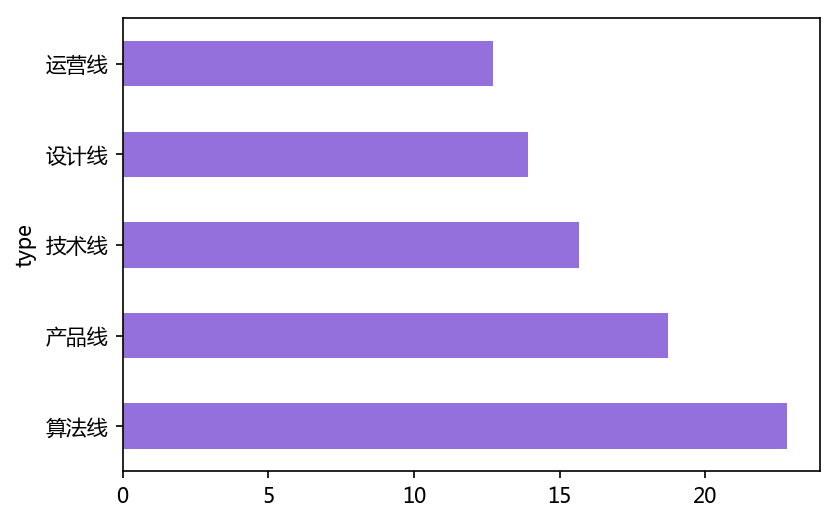

In [150]:

figure1 = jobs_data.groupby(['type']).mean()['avg_salary'].sort_values(ascending=False)
figure_img(figure1)

In [69]:
# 每个大类下的岗位数量
jobs_data['type'].value_counts()

技术线    8731
运营线    4847
设计线    4041
算法线    3792
产品线    2496
Name: type, dtype: int64

In [70]:
pType = ['产品线', '技术线', '设计线', '运营线', '算法线']
for i in pType:
    avg_num = jobs_data[jobs_data['type'] == i]['avg_salary'].mean()
    max_num = jobs_data[jobs_data['type'] == i]['avg_salary'].max()
    min_num = jobs_data[jobs_data['type'] == i]['avg_salary'].min()
    
    print('{}的最大值: {}, 最小值: {}, 平均值: {}'.format(i, max_num, min_num, avg_num))

产品线的最大值: 75.0, 最小值: 1.5, 平均值: 18.724559294871796
技术线的最大值: 120.0, 最小值: 1.5, 平均值: 15.677871950521132
设计线的最大值: 80.5, 最小值: 1.5, 平均值: 13.91029448156397
运营线的最大值: 115.0, 最小值: 1.5, 平均值: 12.724778213327832
算法线的最大值: 150.0, 最小值: 1.0, 平均值: 22.796149789029535


In [37]:
# 根据薪资的排名，发现邢台的平均工资很高，但是邢台只有一个人，不具备统计分析价值，去除城市是邢台的数据。
jobs_data[jobs_data['city'] == '邢台']

,id,positionName,district,stationname,jobNature,companyLabelList,industryField,salary,companySize,skillLables,...,city,keyword,firstType,secondType,thirdType,latitude,longitude,lower_salary,avg_salary,upper_salary


In [33]:
jobs_data = jobs_data.drop(jobs_data[jobs_data['city'] == '邢台'].index)

In [118]:
jobs_data[jobs_data['city']=='西安']['avg_salary'].mean()

10.562221321443047

# 城市与薪资

In [119]:
# 城市与薪资
jobs_data.groupby(['city']).mean()['avg_salary'].sort_values(ascending=False)[0:20]

city
北京     22.277651
上海     19.929340
深圳     18.522481
杭州     17.836332
佛山     14.299197
东莞     13.997312
珠海     13.572519
广州     13.494504
南京     13.318602
厦门     13.250000
大连     13.250000
苏州     12.851626
常州     12.500000
石家庄    12.250000
成都     12.163839
福州     12.100000
马鞍山    12.000000
西宁     12.000000
武汉     11.517780
海口     11.500000
Name: avg_salary, dtype: float64

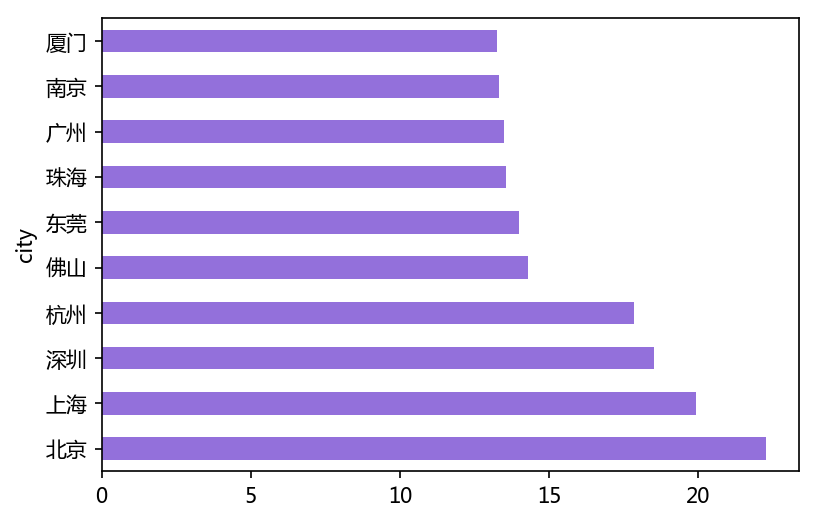

In [151]:

figure2 = jobs_data.groupby(['city']).mean()['avg_salary'].sort_values(ascending=False)[0:10]
figure_img(figure2)

# 城市的岗位需求量

In [72]:
jobs_data['city'].value_counts()[0:20]

北京    14936
上海    11612
深圳     8496
杭州     8227
成都     7074
广州     6095
武汉     4162
南京     2919
西安     2467
长沙     2127
苏州     1968
重庆     1614
郑州     1545
天津     1262
青岛      883
沈阳      613
无锡      575
宁波      552
昆明      511
佛山      249
Name: city, dtype: int64

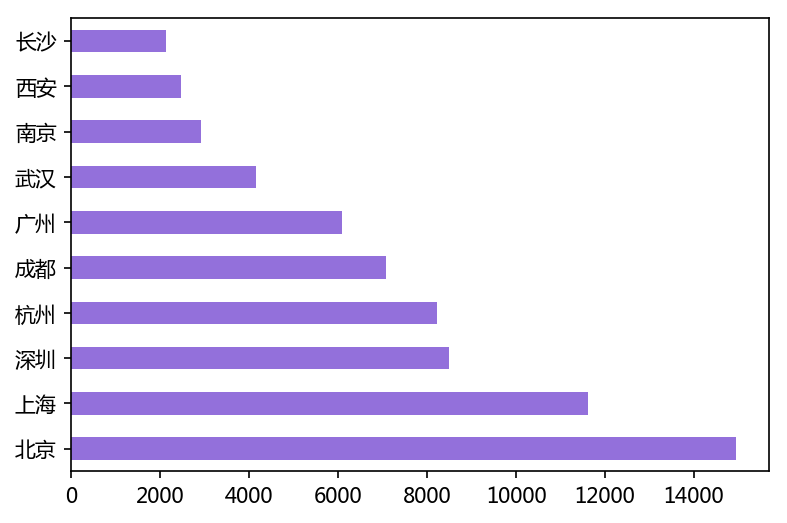

In [176]:

figure3 = jobs_data['city'].value_counts()[0:10]
figure_img(figure3)

# 学历与薪资

In [73]:
# 学历与薪资
jobs_data.groupby(['education']).mean()['avg_salary'].sort_values(ascending=False)

education
博士    35.425000
硕士    27.382179
本科    19.102355
不限    11.891751
大专    10.508904
Name: avg_salary, dtype: float64

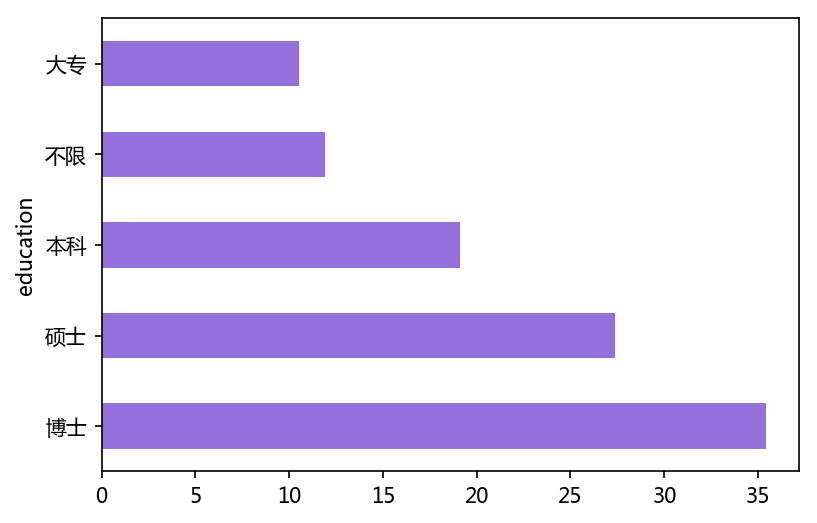

In [152]:

figure4 = jobs_data.groupby(['education']).mean()['avg_salary'].sort_values(ascending=False)
figure_img(figure4)

In [74]:
jobs_data[(jobs_data['education'] == '不限') & (jobs_data['avg_salary'] > 120)]

,id,positionName,district,stationname,jobNature,companyLabelList,industryField,salary,companySize,skillLables,...,city,keyword,firstType,secondType,thirdType,latitude,longitude,lower_salary,avg_salary,upper_salary
252147,300175,大客户代表（区域总裁）,洪山区,佳园路,全职,[],其他,100k-200k,2000人以上,[],...,武汉,客户代表,生产|加工|制造,项目管理|项目协调,项目总监,30.505295,114.430032,100.0,150.0,200.0


In [75]:
education = ['博士', '硕士', '本科', '大专','不限']
for i in education:
    avg_num = jobs_data[jobs_data['education'] == i]['avg_salary'].mean()
    max_num = jobs_data[jobs_data['education'] == i]['avg_salary'].max()
    min_num = jobs_data[jobs_data['education'] == i]['avg_salary'].min()
    print('{}的最大值: {}, 最小值: {}, 平均值: {}'.format(i, max_num, min_num, avg_num))

博士的最大值: 80.0, 最小值: 11.5, 平均值: 35.425
硕士的最大值: 150.0, 最小值: 3.5, 平均值: 27.38217880402605
本科的最大值: 150.0, 最小值: 1.0, 平均值: 19.102354500694357
大专的最大值: 67.0, 最小值: 1.5, 平均值: 10.50890365077593
不限的最大值: 150.0, 最小值: 1.5, 平均值: 11.891751201281366


# 工作年限与薪资

In [76]:
# 工作年限与薪资
jobs_data.groupby(['workYear']).mean()['avg_salary'].sort_values(ascending=False)
#

workYear
10年以上    40.279644
5-10年    27.150591
3-5年     18.681714
不限       12.084390
1-3年     11.295449
应届毕业生     8.562283
1年以下      8.041865
Name: avg_salary, dtype: float64

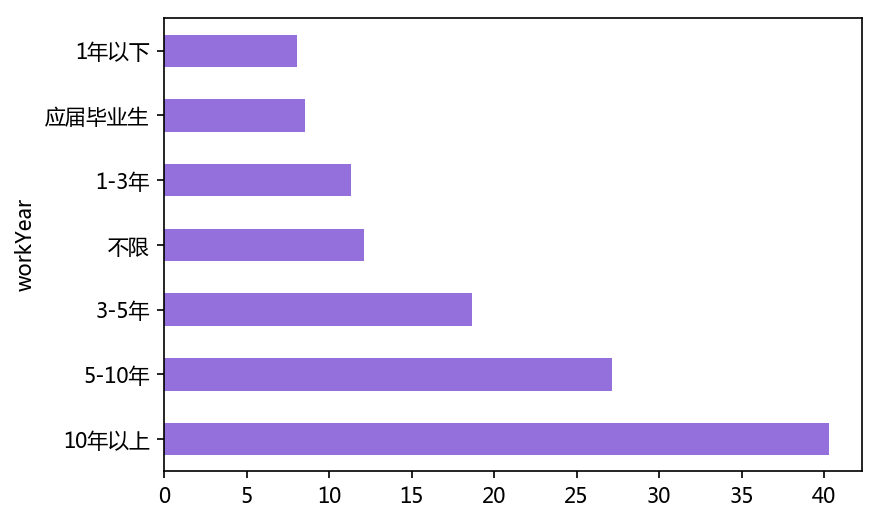

In [153]:

figure5 = jobs_data.groupby(['workYear']).mean()['avg_salary'].sort_values(ascending=False)
figure_img(figure5)

In [77]:
# 工作年限与薪资的最大、最小

year = ['应届毕业生', '1年以下', '1-3年', '不限', '3-5年', '5-10年', '10年以上']
for i in year:
    avg_num = jobs_data[jobs_data['workYear']== i]['avg_salary'].mean()
    max_num = jobs_data[jobs_data['workYear']== i]['avg_salary'].max()
    min_num = jobs_data[jobs_data['workYear']== i]['avg_salary'].min()
    print('{}的最大值: {}, 最小值: {}, 平均值: {}'.format(i, max_num, min_num, avg_num))


应届毕业生的最大值: 40.0, 最小值: 1.5, 平均值: 8.562282734646582
1年以下的最大值: 60.0, 最小值: 1.5, 平均值: 8.041865214431587
1-3年的最大值: 115.0, 最小值: 1.0, 平均值: 11.295449180946985
不限的最大值: 150.0, 最小值: 1.5, 平均值: 12.08438972858768
3-5年的最大值: 150.0, 最小值: 1.5, 平均值: 18.68171420649499
5-10年的最大值: 150.0, 最小值: 1.5, 平均值: 27.150591105273033
10年以上的最大值: 150.0, 最小值: 6.5, 平均值: 40.2796442687747


In [78]:
# 工作年限与薪资的数据展示

year = ['应届毕业生', '1年以下', '1-3年', '不限', '3-5年', '5-10年', '10年以上']
for i in year:
    data_salary = jobs_data[jobs_data['workYear']== i]['avg_salary'][0:10]
    print(i)
    print(data_salary)



应届毕业生
3      10.0
17      9.0
128    17.0
401     8.5
427    12.0
431    15.0
490    15.0
515    25.0
531    30.0
535     8.0
Name: avg_salary, dtype: float64
1年以下
868     22.5
1159     7.0
1179    30.0
1411     9.0
1697    16.0
1778     7.0
1817    12.0
1837    10.0
2010    16.0
2091     5.0
Name: avg_salary, dtype: float64
1-3年
0     12.5
5     15.0
12    15.0
14    30.0
33    20.0
35    11.5
42    22.5
49    10.5
51    15.0
57    11.5
Name: avg_salary, dtype: float64
不限
1     21.0
19    30.0
24    32.5
29    22.5
38    26.5
47    26.5
73    30.0
75    30.0
77    15.0
96    22.5
Name: avg_salary, dtype: float64
3-5年
2     11.5
4     17.5
6     13.5
8     15.0
10    37.5
15    20.0
16    12.5
20    20.0
21    37.5
22    27.5
Name: avg_salary, dtype: float64
5-10年
7     45.0
9     35.0
11    45.0
13    22.5
18    27.5
26    37.5
28    30.0
30    40.0
31    20.0
34    40.0
Name: avg_salary, dtype: float64
10年以上
104     52.5
180     25.0
187     25.0
611     32.5
858     17.5
913     30.

# 公司规模与薪资

In [79]:
# 公司规模与薪资
jobs_data.groupby(['companySize']).mean()['avg_salary'].sort_values(ascending=False)

companySize
2000人以上      22.394331
500-2000人    17.941068
150-500人     15.528639
50-150人      13.651595
15-50人       11.526774
少于15人         9.860306
Name: avg_salary, dtype: float64

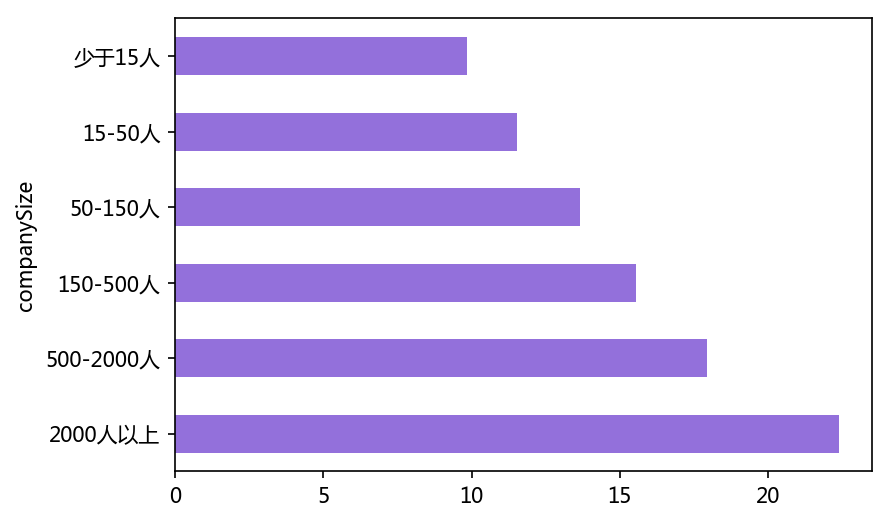

In [154]:
figure6 = jobs_data.groupby(['companySize']).mean()['avg_salary'].sort_values(ascending=False)
figure_img(figure6)

In [80]:
companySize = ['少于15人', '15-50人', '50-150人', '150-500人', '500-2000人', '2000人以上']

for i in companySize:
    max_num = jobs_data[jobs_data['companySize']== i]['avg_salary'].max()
    min_num = jobs_data[jobs_data['companySize']== i]['avg_salary'].min()
    print(i, max_num, min_num)

少于15人 90.0 1.5
15-50人 150.0 1.5
50-150人 115.0 1.5
150-500人 150.0 1.5
500-2000人 125.0 1.5
2000人以上 150.0 1.0


In [81]:
companySize = ['少于15人', '15-50人', '50-150人', '150-500人', '500-2000人', '2000人以上']

for i in companySize:
    max_num = jobs_data[jobs_data['companySize']== i]['lower_salary'].max()
    min_num = jobs_data[jobs_data['companySize']== i]['lower_salary'].min()
    print(i, max_num, min_num)

少于15人 80.0 1.0
15-50人 100.0 1.0
50-150人 100.0 1.0
150-500人 100.0 1.0
500-2000人 100.0 1.0
2000人以上 100.0 1.0


In [83]:
companySize = ['少于15人', '15-50人', '50-150人', '150-500人', '500-2000人', '2000人以上']

for i in companySize:
    avg_num = jobs_data[jobs_data['companySize']== i]['upper_salary'].mean()
    max_num = jobs_data[jobs_data['companySize']== i]['upper_salary'].max()
    min_num = jobs_data[jobs_data['companySize']== i]['upper_salary'].min()
    print('{}的最大值: {}, 最小值: {}, 平均值: {}'.format(i, max_num, min_num, avg_num))

少于15人的最大值: 100.0, 最小值: 2.0, 平均值: 12.368588722523096
15-50人的最大值: 200.0, 最小值: 2.0, 平均值: 14.480387369791666
50-150人的最大值: 150.0, 最小值: 2.0, 平均值: 17.12983762274565
150-500人的最大值: 200.0, 最小值: 2.0, 平均值: 19.457919593121822
500-2000人的最大值: 160.0, 最小值: 2.0, 平均值: 22.502958579881657
2000人以上的最大值: 200.0, 最小值: 1.0, 平均值: 28.5774854595858


# 行业与薪资

In [84]:
# 行业与薪资
jobs_data.groupby(['industryField']).mean()['avg_salary'].sort_values(ascending=False)[0:10]

industryField
广告营销,旅游               45.00
其他、旅游                 40.00
通讯电子、物流丨运输            40.00
物联网 通讯电子              37.50
房产家居,电商               36.25
人工智能 房产家居             35.00
通讯电子 人工智能             35.00
消费生活,游戏               32.50
人工智能,企业服务,数据服务,物联网    32.50
软件开发,消费生活             30.50
Name: avg_salary, dtype: float64

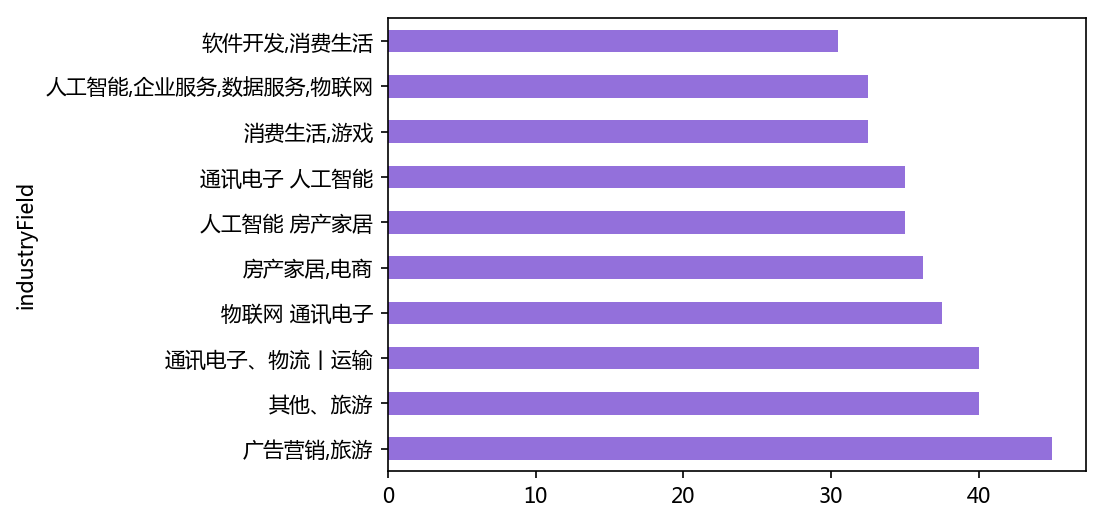

In [177]:
figure7 = jobs_data.groupby(['industryField']).mean()['avg_salary'].sort_values(ascending=False)[0:10]
figure_img(figure7)

# 岗位级别与薪资

In [88]:
# 岗位级别与薪资
jobs_data.groupby(['jobLevel']).mean()['avg_salary'].sort_values(ascending=False)

jobLevel
副总    34.800000
专家    33.015705
总监    29.511794
资深    25.337725
高级    23.522421
中级    13.412346
主管    13.279725
初级     8.272973
Name: avg_salary, dtype: float64

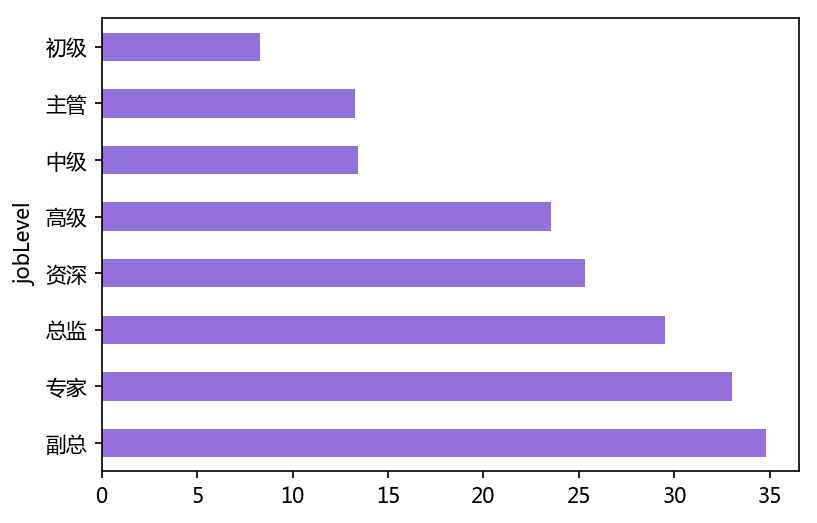

In [178]:
figure8 = jobs_data.groupby(['jobLevel']).mean()['avg_salary'].sort_values(ascending=False)
figure_img(figure8)

In [176]:
jobs_data.keys()

Index(['id', 'positionName', 'district', 'stationname', 'jobNature',
       'companyLabelList', 'industryField', 'salary', 'companySize',
       'skillLables', 'createTime', 'companyFullName', 'workYear', 'education',
       'positionAdvantage', 'url', 'detail', 'type', 'city', 'keyword',
       'firstType', 'secondType', 'thirdType', 'latitude', 'longitude',
       'lower_salary', 'avg_salary', 'upper_salary', 'jobLevel',
       'positiontype'],
      dtype='object')

# 不参考

In [91]:
jobs_data.groupby(['positiontype']).mean()['avg_salary'].sort_values(ascending=False)

positiontype
产品经理    29.731707
后端      19.941058
运维      17.514744
交互设计    17.078723
测试      16.478158
前端      15.913108
UI设计    15.444444
数据运营    15.327338
用户运营    13.257293
内容运营    11.014583
电商运营    10.781215
Name: avg_salary, dtype: float64

# 职位与薪资

In [157]:
# 职位与薪资
jobs_data.groupby(['keyword']).mean()['avg_salary'].sort_values(ascending=False)[0:10]

keyword
大客户代表    63.000000
安全专家     36.805970
架构师      35.395588
数据架构     34.250000
机器学习     32.500000
模式识别     32.026316
搜索       30.711538
资产重组     30.450000
NLP      30.430622
CV       30.282486
Name: avg_salary, dtype: float64

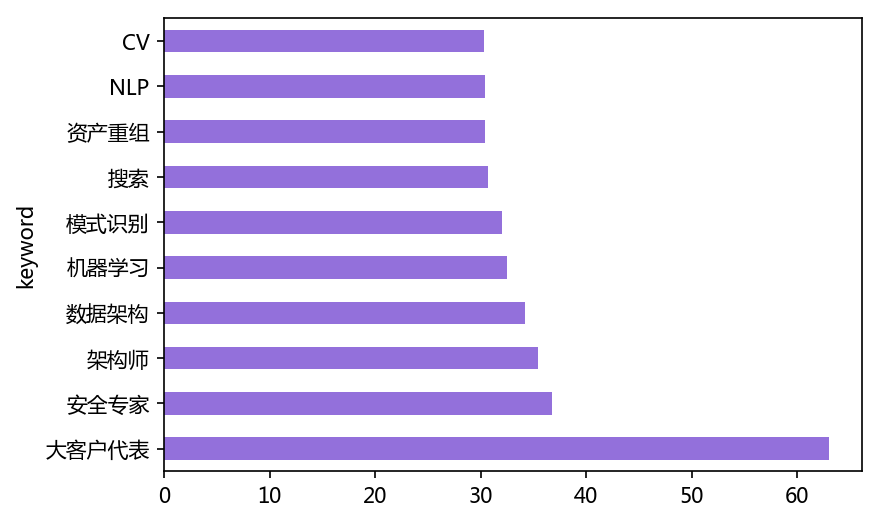

In [158]:
figure10 = jobs_data.groupby(['keyword']).mean()['avg_salary'].sort_values(ascending=False)[0:10]
figure_img(figure10)

In [103]:
# 大类职位下面的小类的平均薪资
pType = ['产品线', '技术线', '设计线', '运营线', '算法线']
for i in pType:
    job_salary = jobs_data[jobs_data['type'] == i].groupby(['keyword']).mean()['avg_salary'].sort_values(ascending=False)
    print(i)
    print(job_salary)
# jobs_data[jobs_data['type'] =='算法线'].groupby(['keyword']).mean()['avg_salary'].sort_values(ascending=False)

产品线
keyword
数据产品经理    19.460585
产品经理      18.116679
Name: avg_salary, dtype: float64
技术线
keyword
python    17.912366
Java      17.746465
运维        16.151596
后端开发      15.998379
php       15.341549
前端开发      14.808151
测试        13.263660
Name: avg_salary, dtype: float64
设计线
keyword
交互设计    17.663669
动画师     14.623853
UI设计    13.695493
原画师     11.581544
Name: avg_salary, dtype: float64
运营线
keyword
用户增长    18.189913
数据运营    17.592661
用户运营    12.353521
电商运营    10.338358
内容运营    10.261755
Name: avg_salary, dtype: float64
算法线
keyword
NLP       30.430622
CV        30.282486
自然语言处理    27.517588
算法        24.930295
算法工程师     22.702128
AI        21.096063
BI        18.840741
计算机视觉     18.247312
Name: avg_salary, dtype: float64


# 各个规模下、职位与薪资

In [171]:
# 各个规模下的职位与薪资
companySize = ['2000人以上', '500-2000人', '150-500人', '50-150人', '15-50人', '少于15人']
pType = ['产品线', '技术线', '设计线', '运营线', '算法线']
job_level = ['初级', '中级', '主管', '高级', '资深', '总监', '专家', '副总']


for k in companySize:
    for i in pType:
        for j in job_level:
            
            job_salary = jobs_data[(jobs_data['type'] == i) & (jobs_data['jobLevel'] == j)]['avg_salary'].mean()
            print('{} 的 {} 的 {} 的平均值: {}'.format(k, i, j, job_salary))


2000人以上 的 产品线 的 初级 的平均值: 10.166666666666666
2000人以上 的 产品线 的 中级 的平均值: 14.2
2000人以上 的 产品线 的 主管 的平均值: 13.272727272727273
2000人以上 的 产品线 的 高级 的平均值: 24.845724907063197
2000人以上 的 产品线 的 资深 的平均值: 30.838983050847457
2000人以上 的 产品线 的 总监 的平均值: 34.995
2000人以上 的 产品线 的 专家 的平均值: 33.47115384615385
2000人以上 的 产品线 的 副总 的平均值: 40.0
2000人以上 的 技术线 的 初级 的平均值: 7.269230769230769
2000人以上 的 技术线 的 中级 的平均值: 11.788461538461538
2000人以上 的 技术线 的 主管 的平均值: 17.930555555555557
2000人以上 的 技术线 的 高级 的平均值: 20.028985507246375
2000人以上 的 技术线 的 资深 的平均值: 26.075675675675676
2000人以上 的 技术线 的 总监 的平均值: 30.26923076923077
2000人以上 的 技术线 的 专家 的平均值: 30.09090909090909
2000人以上 的 技术线 的 副总 的平均值: nan
2000人以上 的 设计线 的 初级 的平均值: 7.136363636363637
2000人以上 的 设计线 的 中级 的平均值: 12.23913043478261
2000人以上 的 设计线 的 主管 的平均值: 10.81578947368421
2000人以上 的 设计线 的 高级 的平均值: 19.595061728395063
2000人以上 的 设计线 的 资深 的平均值: 21.58
2000人以上 的 设计线 的 总监 的平均值: 21.833333333333332
2000人以上 的 设计线 的 专家 的平均值: 29.186046511627907
2000人以上 的 设计线 的 副总 的平均值: nan
2000人以上 的 运营线 的 初级 的平均值: 7.5
2000人

少于15人 的 运营线 的 高级 的平均值: 23.41457286432161
少于15人 的 运营线 的 资深 的平均值: 19.71518987341772
少于15人 的 运营线 的 总监 的平均值: 23.81048387096774
少于15人 的 运营线 的 专家 的平均值: 25.4811320754717
少于15人 的 运营线 的 副总 的平均值: nan
少于15人 的 算法线 的 初级 的平均值: 8.045454545454545
少于15人 的 算法线 的 中级 的平均值: 17.85
少于15人 的 算法线 的 主管 的平均值: 13.742857142857142
少于15人 的 算法线 的 高级 的平均值: 28.006983240223462
少于15人 的 算法线 的 资深 的平均值: 31.111486486486488
少于15人 的 算法线 的 总监 的平均值: 38.484848484848484
少于15人 的 算法线 的 专家 的平均值: 40.31976744186046
少于15人 的 算法线 的 副总 的平均值: nan


# 热门职业： 平均月薪大于20，需求最大的几个岗位

In [93]:
salary_num = 20
#year = '应届毕业生'
salary_requried = jobs_data['avg_salary'].map(lambda x : x >= salary_num)

jobs_data[salary_requried]['thirdType'].value_counts()[0:30]

Java           1574
产品经理           1301
C|C++           894
WEB前端           811
架构师             619
Android         614
算法工程师           609
IOS             570
其他后端开发          542
测试工程师           429
后端开发            379
GO|Golang       370
运维工程师           350
U3D             339
其他运营            338
交互设计师           330
数据开发            328
数据分析            321
数据产品经理          308
PHP             293
项目经理            278
Python          274
自然语言处理（NLP）     264
用户运营            257
售前工程师           244
UI              238
运营              234
其他数据开发          221
市场营销            217
原画师             214
Name: thirdType, dtype: int64

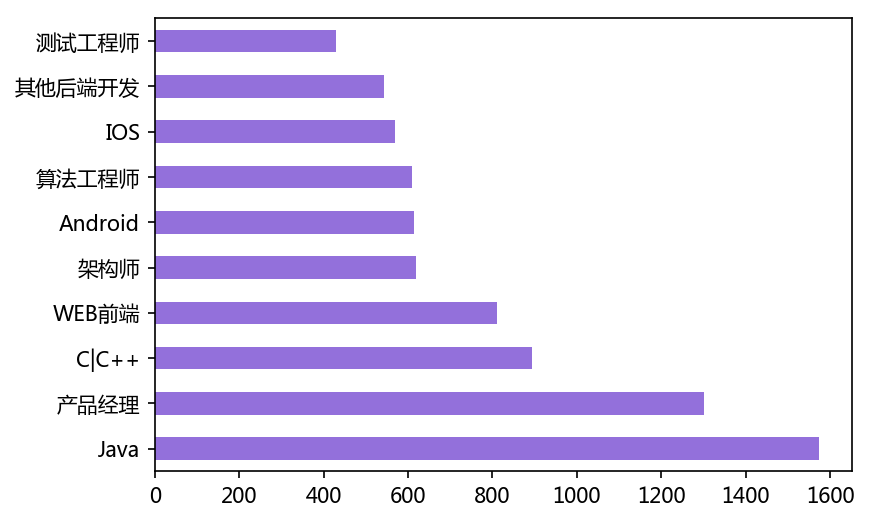

In [155]:
figure9 = jobs_data[salary_requried]['thirdType'].value_counts()[0:10]
figure_img(figure9)

# 招聘文件处理，获取文件编码类型，pandas读取文件


In [ ]:
def get_encoding(file):
    with open(file, 'rb') as f:
        return chardet.detect(f.read())['encoding']
    
import re
import pandas as pd
import chardet

web_name = '前途无忧' # 拉钩/ 智联 / Boss /前途无忧

for file in os.scandir():
    if re.match(web_name, file.name):
        print(file.name)
        encoding = get_encoding(file.name)
        file_data = open(file.name, encoding=encoding, errors='replace')
        file_data = pd.read_csv(file_data)
        print(file_data.head())

In [230]:
def get_salary(salary):
    salary = salary.lower().replace('k', '').replace('以上', '')
    salary_range = salary.split('-')   

    if len(salary_range) == 1:
        return int(salary_range[0]), int(salary_range[0]), int(salary_range[0])
    
    avg_salary = (int(salary_range[0]) + int(salary_range[1])) / 2.0    
    return int(salary_range[0]), avg_salary, int(salary_range[1])


In [232]:
file_data.keys()

Index(['id', 'positionName', 'district', 'stationname', 'jobNature',
       'companyLabelList', 'industryField', 'salary', 'companySize',
       'skillLables', 'createTime', 'companyFullName', 'workYear', 'education',
       'positionAdvantage', 'url', 'detail', 'type', 'city', 'keyword',
       'firstType', 'secondType', 'thirdType', 'latitude', 'longitude',
       'lower_salary', 'avg_salary', 'upper_salary'],
      dtype='object')

这份文档来源参加一个编程比赛，公司举办的，爬取岗位信息，进行数据分析，之后思考产品形式。    
这份文档主要处理了拉勾网站的招聘信息。     
比赛之后的感悟是代码之路，真的很长～～～～